In [1]:
import pandas as pd
import numpy as numpy
import json 
import os 
import pylab as pl
import urllib
import requests
import geopandas as gp
import fiona
import shapely
from fiona.crs import from_epsg
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
path = '/Users/katharinevoorhees/CAPSTONE/nyu_2451_36743/taxi_zones.shp'

taxi = gp.GeoDataFrame.from_file(path)

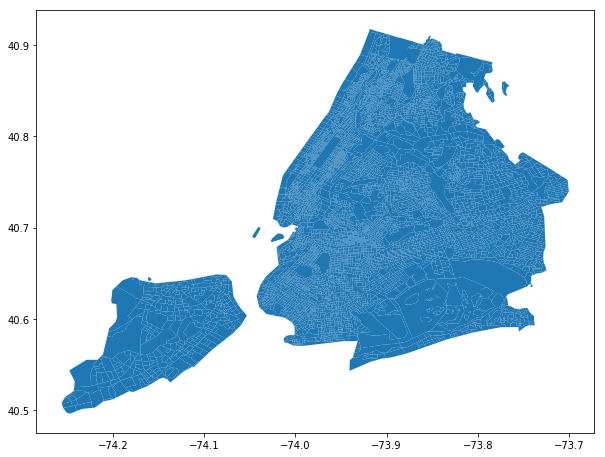

In [3]:
counties = [ '005', '047', '061', '081', '085']

path = '/Users/katharinevoorhees/CAPSTONE/cb_2017_36_bg_500k/cb_2017_36_bg_500k.shp'

blocky = gp.GeoDataFrame.from_file(path)
blocky = blocky[blocky['COUNTYFP'].isin(counties)]

blocky.plot(figsize=(10,10))

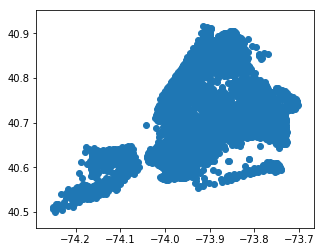

In [4]:
blocky['centroid'] = blocky.centroid

blocky = blocky.set_geometry('centroid')

blocky.plot();

In [5]:
blocky.to_crs(epsg=2263, inplace=True)

In [6]:
taxi.to_crs(epsg=2263, inplace=True)
taxi.crs

{'init': 'epsg:2263', 'no_defs': True}

In [7]:
blocky.shape

(6446, 12)

In [8]:
taxi.shape

(263, 7)

In [9]:
block_join = gp.sjoin(blocky, taxi, how='right')

block_join.head()

,index_left,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry_x,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry_y
index_right,,,,,,,,,,,,,,,,,,,
128,1.0,36,081,027300,5,1500000US360810273005,360810273005,5,BG,36773.0,0.0,"POLYGON ((-73.874455 40.752859, -73.8735279999...",129,0.093273,0.000474,Jackson Heights,129,Queens,"POLYGON ((1018636.130919234 218394.3925719418,..."
128,397.0,36,081,029100,2,1500000US360810291002,360810291002,2,BG,79568.0,0.0,"POLYGON ((-73.897683 40.7524, -73.896192 40.75...",129,0.093273,0.000474,Jackson Heights,129,Queens,"POLYGON ((1018636.130919234 218394.3925719418,..."
128,623.0,36,081,027300,2,1500000US360810273002,360810273002,2,BG,26513.0,0.0,"POLYGON ((-73.873879 40.754904, -73.872692 40....",129,0.093273,0.000474,Jackson Heights,129,Queens,"POLYGON ((1018636.130919234 218394.3925719418,..."
128,864.0,36,081,030903,2,1500000US360810309032,360810309032,2,BG,123398.0,0.0,"POLYGON ((-73.893829 40.760435, -73.892899 40....",129,0.093273,0.000474,Jackson Heights,129,Queens,"POLYGON ((1018636.130919234 218394.3925719418,..."
128,888.0,36,081,030904,2,1500000US360810309042,360810309042,2,BG,113909.0,0.0,POLYGON ((-73.89323999999999 40.76235399999999...,129,0.093273,0.000474,Jackson Heights,129,Queens,"POLYGON ((1018636.130919234 218394.3925719418,..."


In [10]:
len(block_join['LocationID'].unique())

260

In [11]:
block_join = block_join[['GEOID',
       'OBJECTID']]

In [20]:
block_join.head()

,GEOID,OBJECTID
index_right,,
128,360810273005,129
128,360810291002,129
128,360810273002,129
128,360810309032,129
128,360810309042,129


In [13]:
block_join.to_csv('block_to_taxi_zone_key.csv')

The structure of the OD files is as follows:

1 w_geocode Char 15 Workplace Census Block Code

2 h_geocode Char 15 Residence Census Block Code

3 S000 Num 8 Total number of jobs

4 SA01 Num 8 Number of jobs of workers age 29 or younger

5 SA02 Num 8 Number of jobs for workers age 30 to 54

6 SA03 Num 8 Number of jobs for workers age 55 or older

7 SE01 Num 8 Number of jobs with earnings $1250/month or less

8 SE02 Num 8 Number of jobs with earnings $1251/month to $3333/month

9 SE03 Num 8 Number of jobs with earnings greater than $3333/month

10 SI01 Num 8 Number of jobs in Goods Producing industry sectors

11 SI02 Num 8 Number of jobs in Trade, Transportation, and Utilities industry sectors

12 SI03 Num 8 Number of jobs in All Other Services industry sectors

13 createdate Char 8 Date on which data was created, formatted as YYYYMMDD 

In [70]:
#this file contains all jobs

df = pd.read_csv('/Users/katharinevoorhees/CAPSTONE/LEHD 2015/ny_od_main_JT00_2015.csv')
df.head()

,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate
0,360010001001004,360010130001011,1,0,1,0,0,0,1,0,0,1,20170919
1,360010001001004,360010135063013,1,0,0,1,0,0,1,0,1,0,20170919
2,360010001001004,360010144022021,1,0,1,0,0,0,1,0,1,0,20170919
3,360010001001004,360390802013013,1,0,1,0,0,0,1,0,0,1,20170919
4,360010001001004,360650264001002,1,0,1,0,0,0,1,0,1,0,20170919


In [74]:
df.shape

(7416172, 13)

In [35]:
#this file contains all "primary" jobs - the highest paying job for each person

df1 = pd.read_csv('/Users/katharinevoorhees/CAPSTONE/LEHD 2015/ny_od_main_JT01_2015.csv')

In [41]:
df1.shape

(6854282, 13)

In [56]:
block_join.dropna(subset=['GEOID'], inplace=True)
block_join.shape

(6298, 2)

In [57]:
block_join['GEOID'] = block_join['GEOID'].astype('int')

In [86]:
nyc_blocks = list(block_join.GEOID.unique())

In [65]:
key = pd.read_csv('/Users/katharinevoorhees/Downloads/ny_xwalk.csv')

/Users/katharinevoorhees/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (27,28,29,37) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [67]:
key = key[['tabblk2010','trct','bgrp']]

In [101]:
joined = df.merge(key, how='left', left_on='w_geocode', right_on='tabblk2010')

In [102]:
joined.shape

(7416172, 16)

In [103]:
joined.drop(columns=['tabblk2010'], inplace=True)
joined.rename(columns={'trct':'w_trct','bgrp':'w_bgrp'}, inplace=True)

In [104]:
joined.head()

,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate,w_trct,w_bgrp
0,360010001001004,360010130001011,1,0,1,0,0,0,1,0,0,1,20170919,36001000100,360010001001
1,360010001001004,360010135063013,1,0,0,1,0,0,1,0,1,0,20170919,36001000100,360010001001
2,360010001001004,360010144022021,1,0,1,0,0,0,1,0,1,0,20170919,36001000100,360010001001
3,360010001001004,360390802013013,1,0,1,0,0,0,1,0,0,1,20170919,36001000100,360010001001
4,360010001001004,360650264001002,1,0,1,0,0,0,1,0,1,0,20170919,36001000100,360010001001


In [105]:
joined = joined.merge(key, how='left', left_on='h_geocode', right_on='tabblk2010')

In [106]:
joined.shape

(7416172, 18)

In [107]:
joined.drop(columns=['tabblk2010'], inplace=True)
joined.rename(columns={'trct':'h_trct','bgrp':'h_bgrp'}, inplace=True)

In [108]:
joined.head()

,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03,createdate,w_trct,w_bgrp,h_trct,h_bgrp
0,360010001001004,360010130001011,1,0,1,0,0,0,1,0,0,1,20170919,36001000100,360010001001,36001013000,360010130001
1,360010001001004,360010135063013,1,0,0,1,0,0,1,0,1,0,20170919,36001000100,360010001001,36001013506,360010135063
2,360010001001004,360010144022021,1,0,1,0,0,0,1,0,1,0,20170919,36001000100,360010001001,36001014402,360010144022
3,360010001001004,360390802013013,1,0,1,0,0,0,1,0,0,1,20170919,36001000100,360010001001,36039080201,360390802013
4,360010001001004,360650264001002,1,0,1,0,0,0,1,0,1,0,20170919,36001000100,360010001001,36065026400,360650264001


In [109]:
joined['w_bgrp'] = joined['w_bgrp'].astype('int')
joined['h_bgrp'] = joined['h_bgrp'].astype('int')

In [110]:
joined2 = joined.merge(block_join, how='left',left_on='w_bgrp',
                      right_on='GEOID')
joined2.rename(columns={'GEOD':'w_blockgroup','OBJECTID':'w_taxi_zone'}, inplace=True)

In [111]:
nyc_join = joined2[joined2['w_taxi_zone'].notnull()]

In [112]:
nyc_join.shape

(3234541, 19)

In [113]:
nyc_join = nyc_join.merge(block_join, how='left',left_on='h_bgrp',
                      right_on='GEOID')
nyc_join.rename(columns={'GEOD':'h_blockgroup','OBJECTID':'h_taxi_zone'}, inplace=True)

In [114]:
nyc_join = nyc_join[nyc_join['h_taxi_zone'].notnull()]

In [115]:
nyc_join.shape

(2617637, 21)

In [116]:
nyc_join.head()

,w_geocode,h_geocode,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,...,SI03,createdate,w_trct,w_bgrp,h_trct,h_bgrp,GEOID_x,w_taxi_zone,GEOID_y,h_taxi_zone
0,360050001001002,360050002001003,1,1,0,0,0,1,0,0,...,1,20170919,36005000100,360050001001,36005000200,360050002001,3.600500e+11,199.0,3.600500e+11,213.0
1,360050001001002,360050002002006,2,0,2,0,0,0,2,0,...,2,20170919,36005000100,360050001001,36005000200,360050002002,3.600500e+11,199.0,3.600500e+11,213.0
2,360050001001002,360050002003025,1,1,0,0,1,0,0,0,...,1,20170919,36005000100,360050001001,36005000200,360050002003,3.600500e+11,199.0,3.600500e+11,213.0
3,360050001001002,360050004001000,1,0,1,0,1,0,0,0,...,1,20170919,36005000100,360050001001,36005000400,360050004001,3.600500e+11,199.0,3.600500e+11,213.0
4,360050001001002,360050004004001,1,0,1,0,0,0,1,0,...,1,20170919,36005000100,360050001001,36005000400,360050004004,3.600500e+11,199.0,3.600500e+11,213.0


In [125]:
lehd_taxi = nyc_join.groupby(['w_taxi_zone','h_taxi_zone']).sum().reset_index()

In [126]:
lehd_taxi.shape

(56535, 21)

In [128]:
lehd_taxi.columns

Index(['w_taxi_zone', 'h_taxi_zone', 'w_geocode', 'h_geocode', 'S000', 'SA01',
       'SA02', 'SA03', 'SE01', 'SE02', 'SE03', 'SI01', 'SI02', 'SI03',
       'createdate', 'w_trct', 'w_bgrp', 'h_trct', 'h_bgrp', 'GEOID_x',
       'GEOID_y'],
      dtype='object')

In [129]:
lehd_taxi = lehd_taxi[['w_taxi_zone', 'h_taxi_zone','S000', 'SA01',
       'SA02', 'SA03', 'SE01', 'SE02', 'SE03', 'SI01', 'SI02', 'SI03',]]

In [130]:
lehd_taxi.head()

,w_taxi_zone,h_taxi_zone,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03
0,3.0,3.0,273,54,151,68,76,120,77,31,35,207
1,3.0,4.0,1,0,1,0,0,0,1,0,0,1
2,3.0,5.0,2,1,1,0,0,0,2,0,0,2
3,3.0,6.0,1,0,0,1,0,0,1,0,0,1
4,3.0,7.0,7,1,5,1,2,2,3,2,1,4


In [131]:
lehd_taxi.describe()

,w_taxi_zone,h_taxi_zone,S000,SA01,SA02,SA03,SE01,SE02,SE03,SI01,SI02,SI03
count,56535.000000,56535.000000,56535.000000,56535.000000,56535.000000,56535.000000,56535.000000,56535.000000,56535.000000,56535.000000,56535.000000,56535.000000
mean,135.284125,133.689714,53.576935,12.272168,30.126117,11.178650,11.559901,16.306536,25.710498,2.684001,8.756063,42.136871
std,75.731753,76.292377,126.432631,31.990029,71.208710,26.874668,34.999061,38.501747,71.282454,9.064114,26.672335,104.065136
min,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,67.000000,5.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,3.000000
50%,138.000000,136.000000,15.000000,3.000000,8.000000,3.000000,3.000000,5.000000,6.000000,0.000000,2.000000,11.000000
75%,201.000000,201.000000,49.000000,11.000000,27.000000,10.000000,11.000000,16.000000,20.000000,2.000000,7.000000,37.000000
max,263.000000,263.000000,9035.000000,2757.000000,4504.000000,1774.000000,4433.000000,2947.000000,2004.000000,554.000000,2016.000000,6465.000000


In [132]:
lehd_taxi.to_csv('lehd_by_taxi_zone.csv')